✅ 环境准备完成
📊 找到 4 只股票:
  1. 1810
  2. 700
  3. 941
  4. 9988

🔍 创建投资组合:
  • 1810
  • 700
  • 941
✅ 1810: 加载 1857 行数据
✅ 700: 加载 5311 行数据
✅ 941: 加载 6794 行数据

✅ 投资组合创建成功
   股票数量: 3
   交易日数: 1857
   时间范围: 2018-07-09 到 2026-01-21

📈 基础分析

📊 各股票表现统计:
  股票   起始价格   最新价格    总收益率   年化收益   年化波动  夏普比率
1810  16.80  35.42 110.83% 20.70% 46.09% 0.449
 700 351.68 602.50  71.32% 14.38% 37.76% 0.381
 941  43.77  79.20  80.96% 10.34% 21.48% 0.482

🏆 表现总结:
  最佳表现: 1810 (110.83%)
  最差表现: 700 (71.32%)

📊 生成价格走势图...


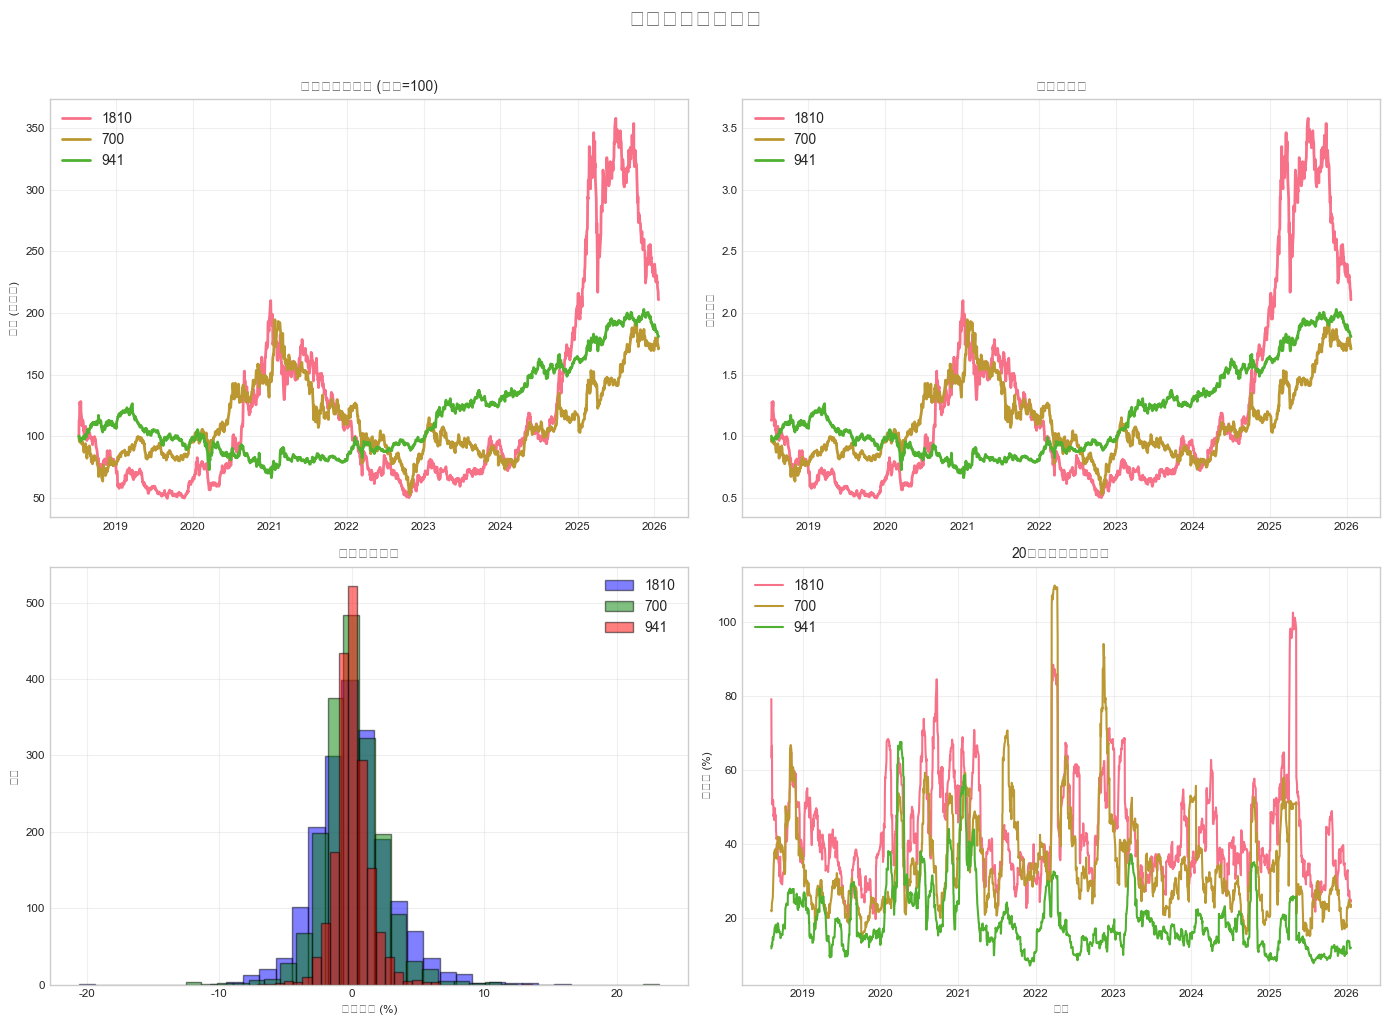


🔗 相关性分析

📊 收益率相关性矩阵:
       1810    700    941
1810  1.000  0.556  0.283
700   0.556  1.000  0.312
941   0.283  0.312  1.000

📈 相关性统计:
  平均相关性: 0.384
  最小相关性: 0.283
  最大相关性: 0.556

🎨 生成相关性热图...


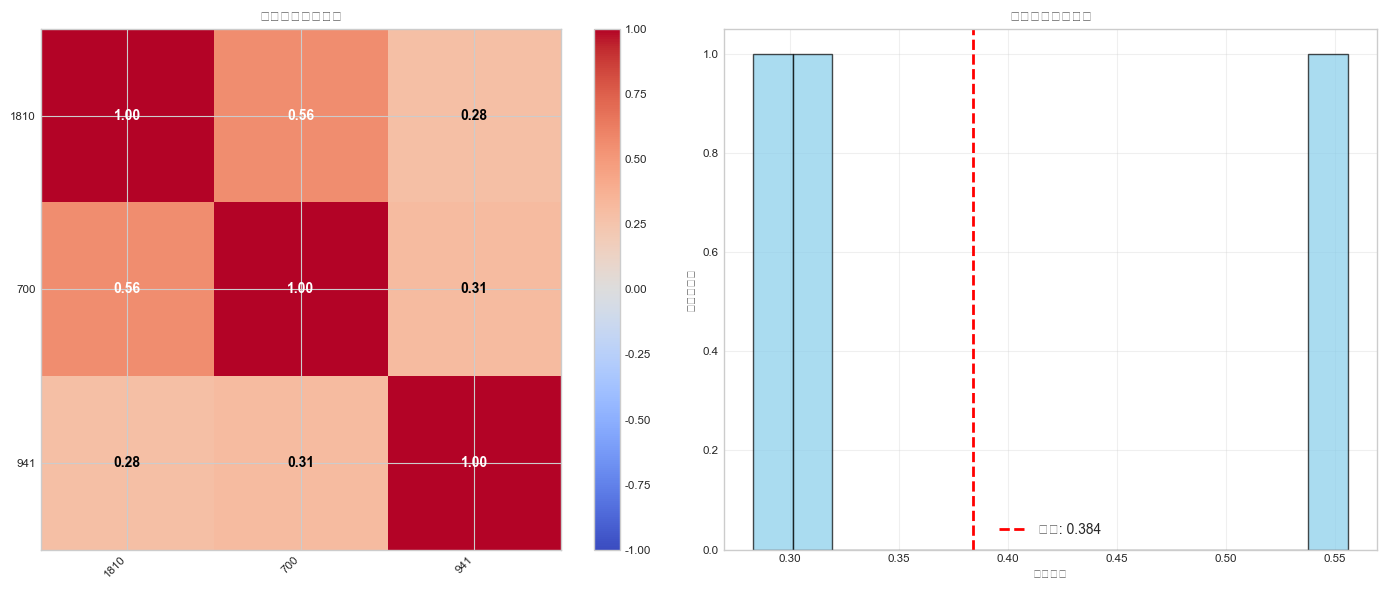


🔍 重要相关性识别:
  ✅ 没有发现过高相关性的股票对

⚖️ 投资组合绩效分析

📊 等权重投资组合:
  资产数量: 3
  1810: 33.3%
  700: 33.3%
  941: 33.3%

📈 绩效统计:
  总收益率: 129.04%
  年化收益率: 15.14%
  年化波动率: 27.92%
  夏普比率 (rf=0): 0.542
  最大回撤: -54.13%
  胜率: 50.5%

📊 生成投资组合表现图表...


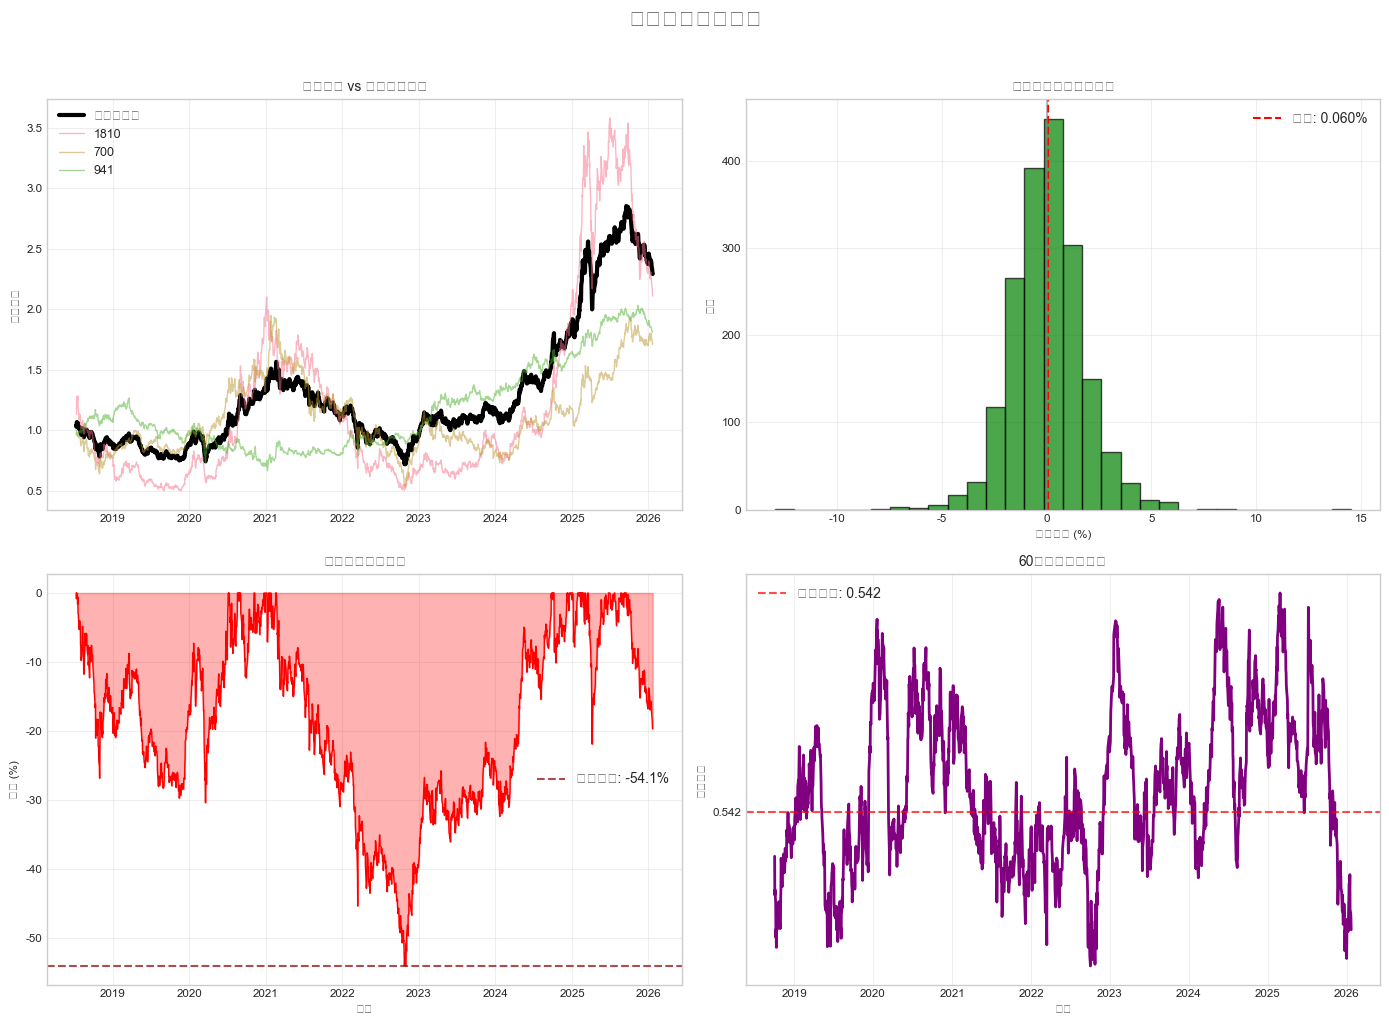


📋 绩效比较表格

绩效排名 (按夏普比率降序):
组合/股票 年化收益 (%) 年化波动 (%)  夏普比率 最大回撤 (%) 总收益率 (%)
等权重组合   15.14%   27.92% 0.542  -54.13%  129.04%
  941   10.34%   21.48% 0.482  -47.43%   80.96%
 1810   20.70%   46.09% 0.449  -76.06%  110.83%
  700   14.38%   37.76% 0.381  -72.81%   71.32%

💡 分析结论:
  1. 最佳表现: 等权重组合 (夏普比率: 0.542)
  2. 最差表现: 700 (夏普比率: 0.381)
  3. ✅ 投资组合的夏普比率(0.542)高于个股平均(0.437)
     投资组合分散效果良好

💡 投资建议

📊 投资组合特征:
  • 股票数量: 3
  • 平均相关性: 0.384
  • 年化波动率: 27.9%
  • 夏普比率: 0.542

🎯 建议:
  • 📊 股票间相关性适中
  • 建议: 可以考虑小幅调整以优化风险收益
  • ⚠️  组合波动率较高
  • 建议: 适合风险承受能力强的投资者
  • 可考虑增加防御性股票或降低仓位
  • 👍 风险调整收益良好
  • 建议: 可考虑优化权重配置

📅 后续步骤:
  1. 定期（每季度）重新评估投资组合
  2. 监控个股基本面和市场变化
  3. 考虑再平衡策略
  4. 根据风险承受能力调整仓位

💾 导出分析结果...
  ✅ 投资组合数据: d:\Vscode\stock-analysis-tool\output\portfolio\portfolio_20260122_165725.csv
  ✅ 收益数据: d:\Vscode\stock-analysis-tool\output\portfolio\returns_20260122_165725.csv
  ✅ 绩效统计: d:\Vscode\stock-analysis-tool\output\portfolio\performance_20260122_165725.csv
  ✅ 分析报告: d:\Vscode\stock-analysis-too

In [2]:
# %% [markdown]
# # 📈 投资组合分析
# 
# **作者：** Joey  
# **日期：** 2026年1月  
# 
# 简单的股票投资组合分析
# 

# %%
# 基础设置
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 添加项目路径
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# 数据科学库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ 环境准备完成")

# %% [markdown]
# ## 1. 数据加载工具

# %%
class PortfolioAnalyzer:
    """简化的投资组合分析器"""
    
    def __init__(self):
        self.project_root = project_root
        self.data_dir = project_root / "data" / "cleaned"
        
    def get_available_stocks(self):
        """获取可用股票列表"""
        if not self.data_dir.exists():
            print(f"数据目录不存在: {self.data_dir}")
            return []
        
        files = list(self.data_dir.glob("*.csv"))
        stocks = []
        
        for f in files:
            # 从文件名提取股票代码
            name = f.stem
            
            if '_cleaned' in name:
                ticker = name.replace('_cleaned', '')
            elif 'CLEANED_' in name:
                # 处理CLEANED_开头的文件
                ticker = name.replace('CLEANED_', '').split('_')[0]
            else:
                # 尝试提取数字代码
                import re
                numbers = re.findall(r'\d+', name)
                ticker = numbers[0] if numbers else name[:6]
            
            # 去重
            if ticker not in stocks:
                stocks.append(ticker)
        
        return sorted(stocks)
    
    def load_stock_data(self, ticker):
        """加载单只股票数据"""
        if not self.data_dir.exists():
            return None
        
        # 查找匹配的文件
        matched_files = []
        for file in self.data_dir.glob("*.csv"):
            filename = file.stem
            if ticker in filename or filename.replace('_cleaned', '') == ticker:
                matched_files.append(file)
        
        if not matched_files:
            print(f"未找到 {ticker} 的数据文件")
            return None
        
        # 使用第一个匹配的文件
        filepath = matched_files[0]
        
        try:
            # 读取CSV
            df = pd.read_csv(filepath)
            
            # 查找日期列
            date_col = None
            for col in ['date', 'Date', 'datetime', '日期']:
                if col in df.columns:
                    date_col = col
                    break
            
            # 设置日期索引
            if date_col:
                df[date_col] = pd.to_datetime(df[date_col])
                df.set_index(date_col, inplace=True)
            
            # 标准化列名
            col_map = {
                '收盘价': 'close', 'Close': 'close', '收盘': 'close',
                '开盘价': 'open', 'Open': 'open', '开盘': 'open',
                '最高价': 'high', 'High': 'high', '最高': 'high',
                '最低价': 'low', 'Low': 'low', '最低': 'low',
                '成交量': 'volume', 'Volume': 'volume'
            }
            
            # 重命名存在的列
            for old_name, new_name in col_map.items():
                if old_name in df.columns and new_name not in df.columns:
                    df.rename(columns={old_name: new_name}, inplace=True)
            
            print(f"✅ {ticker}: 加载 {len(df)} 行数据")
            return df
            
        except Exception as e:
            print(f"❌ 加载 {ticker} 失败: {e}")
            return None
    
    def create_portfolio(self, tickers):
        """创建投资组合数据集"""
        portfolio_data = {}
        
        for ticker in tickers:
            df = self.load_stock_data(ticker)
            if df is not None and 'close' in df.columns:
                portfolio_data[ticker] = df['close']
        
        if len(portfolio_data) < 2:
            print("❌ 需要至少2只股票创建投资组合")
            return None
        
        # 合并数据
        portfolio_df = pd.DataFrame(portfolio_data)
        
        # 删除缺失值
        portfolio_df = portfolio_df.dropna()
        
        if len(portfolio_df) == 0:
            print("❌ 没有共同交易日期")
            return None
        
        print(f"\n✅ 投资组合创建成功")
        print(f"   股票数量: {len(portfolio_df.columns)}")
        print(f"   交易日数: {len(portfolio_df)}")
        print(f"   时间范围: {portfolio_df.index.min().date()} 到 {portfolio_df.index.max().date()}")
        
        return portfolio_df

# 初始化分析器
analyzer = PortfolioAnalyzer()

# %% [markdown]
# ## 2. 查看可用数据

# %%
# 获取可用股票
available_stocks = analyzer.get_available_stocks()

if available_stocks:
    print(f"📊 找到 {len(available_stocks)} 只股票:")
    for i, stock in enumerate(available_stocks, 1):
        print(f"  {i}. {stock}")
else:
    print("❌ 没有找到股票数据")
    print(f"请检查目录: {analyzer.data_dir}")

# %% [markdown]
# ## 3. 创建投资组合

# %%
if len(available_stocks) >= 2:
    # 选择前3只股票（或最多3只）
    selected_tickers = available_stocks[:min(3, len(available_stocks))]
    
    print(f"\n🔍 创建投资组合:")
    for ticker in selected_tickers:
        print(f"  • {ticker}")
    
    # 创建投资组合
    portfolio_df = analyzer.create_portfolio(selected_tickers)
else:
    print("❌ 需要至少2只股票进行分析")
    portfolio_df = None

# %% [markdown]
# ## 4. 基础分析

# %%
if portfolio_df is not None:
    print("\n📈 基础分析")
    print("="*50)
    
    # 计算日收益率
    returns_df = portfolio_df.pct_change().dropna()
    
    # 计算基本统计
    print("\n📊 各股票表现统计:")
    
    stats_data = []
    for ticker in portfolio_df.columns:
        price_series = portfolio_df[ticker]
        returns_series = returns_df[ticker]
        
        stats = {
            '股票': ticker,
            '起始价格': f"{price_series.iloc[0]:.2f}",
            '最新价格': f"{price_series.iloc[-1]:.2f}",
            '总收益率': f"{(price_series.iloc[-1] / price_series.iloc[0] - 1) * 100:.2f}%",
            '年化收益': f"{returns_series.mean() * 252 * 100:.2f}%",
            '年化波动': f"{returns_series.std() * np.sqrt(252) * 100:.2f}%",
            '夏普比率': f"{(returns_series.mean() / returns_series.std() * np.sqrt(252)):.3f}"
        }
        stats_data.append(stats)
    
    stats_df = pd.DataFrame(stats_data)
    print(stats_df.to_string(index=False))
    
    # 找出最佳和最差表现
    if len(stats_data) > 1:
        best_return = max(stats_data, key=lambda x: float(x['总收益率'].replace('%', '')))
        worst_return = min(stats_data, key=lambda x: float(x['总收益率'].replace('%', '')))
        
        print(f"\n🏆 表现总结:")
        print(f"  最佳表现: {best_return['股票']} ({best_return['总收益率']})")
        print(f"  最差表现: {worst_return['股票']} ({worst_return['总收益率']})")
    
    # 可视化：价格走势
    print("\n📊 生成价格走势图...")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. 标准化价格对比
    ax1 = axes[0, 0]
    normalized_prices = portfolio_df / portfolio_df.iloc[0] * 100
    for ticker in normalized_prices.columns:
        ax1.plot(normalized_prices.index, normalized_prices[ticker], 
                label=ticker, linewidth=2)
    ax1.set_title('标准化价格对比 (基准=100)')
    ax1.set_ylabel('价格 (标准化)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. 累计收益率
    ax2 = axes[0, 1]
    cumulative_returns = (1 + returns_df).cumprod()
    for ticker in cumulative_returns.columns:
        ax2.plot(cumulative_returns.index, cumulative_returns[ticker], 
                label=ticker, linewidth=2)
    ax2.set_title('累计收益率')
    ax2.set_ylabel('累计收益')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. 日收益率分布
    ax3 = axes[1, 0]
    colors = ['blue', 'green', 'red']
    for i, (ticker, color) in enumerate(zip(returns_df.columns, colors)):
        ax3.hist(returns_df[ticker] * 100, bins=30, alpha=0.5, 
                label=ticker, color=color, edgecolor='black')
    ax3.set_title('日收益率分布')
    ax3.set_xlabel('日收益率 (%)')
    ax3.set_ylabel('频次')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. 滚动波动率 (20日)
    ax4 = axes[1, 1]
    if len(returns_df) >= 20:
        rolling_vol = returns_df.rolling(window=20).std() * np.sqrt(252) * 100
        for ticker in rolling_vol.columns:
            ax4.plot(rolling_vol.index, rolling_vol[ticker], 
                    label=ticker, linewidth=1.5)
        ax4.set_title('20日滚动年化波动率')
        ax4.set_ylabel('波动率 (%)')
        ax4.set_xlabel('日期')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, '数据不足计算滚动波动率', 
                ha='center', va='center', transform=ax4.transAxes)
    
    plt.suptitle('投资组合基础分析', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## 5. 相关性分析

# %%
if portfolio_df is not None and len(portfolio_df.columns) >= 2:
    print("\n🔗 相关性分析")
    print("="*50)
    
    # 计算相关性矩阵
    correlation_matrix = returns_df.corr()
    
    print(f"\n📊 收益率相关性矩阵:")
    print(correlation_matrix.round(3))
    
    # 计算平均相关性
    corr_values = correlation_matrix.values
    upper_triangle = corr_values[np.triu_indices_from(corr_values, k=1)]
    
    print(f"\n📈 相关性统计:")
    print(f"  平均相关性: {upper_triangle.mean():.3f}")
    print(f"  最小相关性: {upper_triangle.min():.3f}")
    print(f"  最大相关性: {upper_triangle.max():.3f}")
    
    # 可视化：相关性热图
    print("\n🎨 生成相关性热图...")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 相关性热图
    im = ax1.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    ax1.set_title('收益率相关性热图')
    ax1.set_xticks(range(len(correlation_matrix.columns)))
    ax1.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
    ax1.set_yticks(range(len(correlation_matrix.columns)))
    ax1.set_yticklabels(correlation_matrix.columns)
    
    # 添加数值
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            value = correlation_matrix.iloc[i, j]
            color = 'white' if abs(value) > 0.5 else 'black'
            ax1.text(j, i, f'{value:.2f}', ha='center', va='center', 
                    color=color, fontsize=10, fontweight='bold')
    
    plt.colorbar(im, ax=ax1)
    
    # 相关性分布
    ax2.hist(upper_triangle, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.axvline(upper_triangle.mean(), color='red', linestyle='--', 
               linewidth=2, label=f'均值: {upper_triangle.mean():.3f}')
    ax2.set_title('股票对相关性分布')
    ax2.set_xlabel('相关系数')
    ax2.set_ylabel('股票对数量')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 识别重要相关性
    print("\n🔍 重要相关性识别:")
    
    # 找出高相关性对 (>0.7)
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            stock1 = correlation_matrix.columns[i]
            stock2 = correlation_matrix.columns[j]
            corr = correlation_matrix.iloc[i, j]
            
            if corr > 0.7:
                high_corr_pairs.append((stock1, stock2, corr))
            elif corr < 0:
                print(f"  {stock1} 和 {stock2} 负相关: {corr:.3f}")
    
    if high_corr_pairs:
        print(f"\n⚠️  高相关性股票对 (相关系数 > 0.7):")
        for stock1, stock2, corr in high_corr_pairs:
            print(f"  • {stock1} - {stock2}: {corr:.3f}")
        print("  建议: 考虑调整组合以降低相关性风险")
    else:
        print("  ✅ 没有发现过高相关性的股票对")

# %% [markdown]
# ## 6. 投资组合绩效分析

# %%
if portfolio_df is not None:
    print("\n⚖️ 投资组合绩效分析")
    print("="*50)
    
    # 等权重投资组合
    n_assets = len(portfolio_df.columns)
    equal_weights = np.ones(n_assets) / n_assets
    
    print(f"\n📊 等权重投资组合:")
    print(f"  资产数量: {n_assets}")
    for i, ticker in enumerate(portfolio_df.columns):
        print(f"  {ticker}: {equal_weights[i]:.1%}")
    
    # 计算投资组合收益
    portfolio_returns = (returns_df * equal_weights).sum(axis=1)
    
    # 投资组合统计
    portfolio_stats = {
        '总收益率': f"{((1 + portfolio_returns).prod() - 1) * 100:.2f}%",
        '年化收益率': f"{portfolio_returns.mean() * 252 * 100:.2f}%",
        '年化波动率': f"{portfolio_returns.std() * np.sqrt(252) * 100:.2f}%",
        '夏普比率 (rf=0)': f"{portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252):.3f}",
        '最大回撤': f"{((1 + portfolio_returns).cumprod() / (1 + portfolio_returns).cumprod().cummax() - 1).min() * 100:.2f}%",
        '胜率': f"{(portfolio_returns > 0).mean() * 100:.1f}%"
    }
    
    print(f"\n📈 绩效统计:")
    for key, value in portfolio_stats.items():
        print(f"  {key}: {value}")
    
    # 可视化：投资组合表现
    print("\n📊 生成投资组合表现图表...")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. 投资组合累计收益 vs 个股
    ax1 = axes[0, 0]
    # 投资组合累计收益
    port_cumulative = (1 + portfolio_returns).cumprod()
    ax1.plot(port_cumulative.index, port_cumulative, 
            label='等权重组合', linewidth=3, color='black')
    
    # 个股累计收益
    for ticker in returns_df.columns:
        stock_cumulative = (1 + returns_df[ticker]).cumprod()
        ax1.plot(stock_cumulative.index, stock_cumulative, 
                alpha=0.5, linewidth=1, label=ticker)
    
    ax1.set_title('投资组合 vs 个股累计收益')
    ax1.set_ylabel('累计收益')
    ax1.legend(loc='upper left', fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # 2. 投资组合日收益率分布
    ax2 = axes[0, 1]
    ax2.hist(portfolio_returns * 100, bins=30, alpha=0.7, 
            color='green', edgecolor='black')
    ax2.axvline(portfolio_returns.mean() * 100, color='red', 
               linestyle='--', label=f'均值: {portfolio_returns.mean()*100:.3f}%')
    ax2.axvline(0, color='gray', linestyle='-', alpha=0.5)
    ax2.set_title('投资组合日收益率分布')
    ax2.set_xlabel('日收益率 (%)')
    ax2.set_ylabel('频次')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. 投资组合回撤
    ax3 = axes[1, 0]
    cumulative = (1 + portfolio_returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max * 100
    
    ax3.fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.3)
    ax3.plot(drawdown.index, drawdown, color='red', linewidth=1)
    
    # 标记最大回撤
    max_dd = drawdown.min()
    max_dd_date = drawdown.idxmin()
    ax3.axhline(max_dd, color='darkred', linestyle='--', alpha=0.7,
               label=f'最大回撤: {max_dd:.1f}%')
    
    ax3.set_title('投资组合回撤分析')
    ax3.set_ylabel('回撤 (%)')
    ax3.set_xlabel('日期')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. 滚动夏普比率 (60日)
    ax4 = axes[1, 1]
    if len(portfolio_returns) >= 60:
        rolling_sharpe = portfolio_returns.rolling(window=60).apply(
            lambda x: x.mean() / x.std() * np.sqrt(252) if x.std() > 0 else 0
        )
        ax4.plot(rolling_sharpe.index, rolling_sharpe, linewidth=2, color='purple')
        ax4.axhline(portfolio_stats['夏普比率 (rf=0)'], 
                   color='red', linestyle='--', alpha=0.7,
                   label=f'整体夏普: {float(portfolio_stats["夏普比率 (rf=0)"].replace("%", "")):.3f}')
        ax4.set_title('60日滚动夏普比率')
        ax4.set_ylabel('夏普比率')
        ax4.set_xlabel('日期')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, '数据不足计算滚动夏普比率', 
                ha='center', va='center', transform=ax4.transAxes)
    
    plt.suptitle('投资组合绩效分析', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## 7. 绩效比较表格

# %%
if portfolio_df is not None:
    print("\n📋 绩效比较表格")
    print("="*50)
    
    # 准备比较数据
    comparison_data = []
    
    # 添加等权重组合
    comparison_data.append({
        '组合/股票': '等权重组合',
        '年化收益 (%)': portfolio_returns.mean() * 252 * 100,
        '年化波动 (%)': portfolio_returns.std() * np.sqrt(252) * 100,
        '夏普比率': portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252),
        '最大回撤 (%)': ((1 + portfolio_returns).cumprod() / 
                        (1 + portfolio_returns).cumprod().cummax() - 1).min() * 100,
        '总收益率 (%)': ((1 + portfolio_returns).prod() - 1) * 100
    })
    
    # 添加个股
    for ticker in returns_df.columns:
        ret_series = returns_df[ticker]
        cum_ret = (1 + ret_series).prod() - 1
        
        comparison_data.append({
            '组合/股票': ticker,
            '年化收益 (%)': ret_series.mean() * 252 * 100,
            '年化波动 (%)': ret_series.std() * np.sqrt(252) * 100,
            '夏普比率': ret_series.mean() / ret_series.std() * np.sqrt(252),
            '最大回撤 (%)': ((1 + ret_series).cumprod() / 
                           (1 + ret_series).cumprod().cummax() - 1).min() * 100,
            '总收益率 (%)': cum_ret * 100
        })
    
    # 创建DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    
    # 排序（按夏普比率）
    comparison_df = comparison_df.sort_values('夏普比率', ascending=False)
    
    print("\n绩效排名 (按夏普比率降序):")
    display_df = comparison_df.copy()
    
    # 格式化显示
    def format_percent(x):
        return f"{x:.2f}%"
    
    def format_number(x):
        return f"{x:.3f}"
    
    display_df['年化收益 (%)'] = display_df['年化收益 (%)'].apply(format_percent)
    display_df['年化波动 (%)'] = display_df['年化波动 (%)'].apply(format_percent)
    display_df['夏普比率'] = display_df['夏普比率'].apply(format_number)
    display_df['最大回撤 (%)'] = display_df['最大回撤 (%)'].apply(format_percent)
    display_df['总收益率 (%)'] = display_df['总收益率 (%)'].apply(format_percent)
    
    print(display_df.to_string(index=False))
    
    # 分析结论
    print("\n💡 分析结论:")
    
    best_performer = comparison_df.iloc[0]
    worst_performer = comparison_df.iloc[-1]
    
    print(f"  1. 最佳表现: {best_performer['组合/股票']} (夏普比率: {best_performer['夏普比率']:.3f})")
    print(f"  2. 最差表现: {worst_performer['组合/股票']} (夏普比率: {worst_performer['夏普比率']:.3f})")
    
    # 检查投资组合是否优于个股
    portfolio_row = comparison_df[comparison_df['组合/股票'] == '等权重组合'].iloc[0]
    avg_sharpe = comparison_df[comparison_df['组合/股票'] != '等权重组合']['夏普比率'].mean()
    
    if portfolio_row['夏普比率'] > avg_sharpe:
        print(f"  3. ✅ 投资组合的夏普比率({portfolio_row['夏普比率']:.3f})高于个股平均({avg_sharpe:.3f})")
        print("     投资组合分散效果良好")
    else:
        print(f"  3. ⚠️  投资组合的夏普比率({portfolio_row['夏普比率']:.3f})低于个股平均({avg_sharpe:.3f})")
        print("     可能需要调整组合权重")

# %% [markdown]
# ## 8. 简单投资建议

# %%
if portfolio_df is not None:
    print("\n💡 投资建议")
    print("="*50)
    
    # 计算关键指标
    avg_correlation = returns_df.corr().values[np.triu_indices_from(returns_df.corr(), k=1)].mean()
    portfolio_volatility = portfolio_returns.std() * np.sqrt(252) * 100
    portfolio_sharpe = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)
    
    print(f"\n📊 投资组合特征:")
    print(f"  • 股票数量: {len(portfolio_df.columns)}")
    print(f"  • 平均相关性: {avg_correlation:.3f}")
    print(f"  • 年化波动率: {portfolio_volatility:.1f}%")
    print(f"  • 夏普比率: {portfolio_sharpe:.3f}")
    
    print(f"\n🎯 建议:")
    
    # 基于相关性的建议
    if avg_correlation > 0.7:
        print("  • ⚠️  股票间相关性较高")
        print("  • 建议: 考虑加入不同行业或市场的股票以分散风险")
    elif avg_correlation < 0.3:
        print("  • ✅ 股票间相关性较低")
        print("  • 建议: 当前组合分散效果良好，可保持现有配置")
    else:
        print("  • 📊 股票间相关性适中")
        print("  • 建议: 可以考虑小幅调整以优化风险收益")
    
    # 基于波动率的建议
    if portfolio_volatility > 25:
        print("  • ⚠️  组合波动率较高")
        print("  • 建议: 适合风险承受能力强的投资者")
        print("  • 可考虑增加防御性股票或降低仓位")
    elif portfolio_volatility < 15:
        print("  • ✅ 组合波动率较低")
        print("  • 建议: 适合稳健型投资者")
        print("  • 当前配置较为保守")
    else:
        print("  • 📊 组合波动率适中")
        print("  • 建议: 适合大多数投资者")
    
    # 基于夏普比率的建议
    if portfolio_sharpe > 1.0:
        print("  • 🏆 风险调整收益优秀")
        print("  • 建议: 继续保持当前策略")
    elif portfolio_sharpe > 0.5:
        print("  • 👍 风险调整收益良好")
        print("  • 建议: 可考虑优化权重配置")
    else:
        print("  • ⚠️  风险调整收益偏低")
        print("  • 建议: 重新评估股票选择或考虑其他资产")
    
    print(f"\n📅 后续步骤:")
    print("  1. 定期（每季度）重新评估投资组合")
    print("  2. 监控个股基本面和市场变化")
    print("  3. 考虑再平衡策略")
    print("  4. 根据风险承受能力调整仓位")

# %% [markdown]
# ## 9. 导出结果

# %%
if portfolio_df is not None:
    print("\n💾 导出分析结果...")
    
    # 创建输出目录
    import os
    output_dir = project_root / "output" / "portfolio"
    os.makedirs(output_dir, exist_ok=True)
    
    # 当前时间戳
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # 1. 导出投资组合数据
    portfolio_file = output_dir / f"portfolio_{timestamp}.csv"
    portfolio_df.to_csv(portfolio_file)
    print(f"  ✅ 投资组合数据: {portfolio_file}")
    
    # 2. 导出收益数据
    returns_file = output_dir / f"returns_{timestamp}.csv"
    returns_df.to_csv(returns_file)
    print(f"  ✅ 收益数据: {returns_file}")
    
    # 3. 导出绩效统计
    if 'comparison_df' in locals():
        stats_file = output_dir / f"performance_{timestamp}.csv"
        comparison_df.to_csv(stats_file, index=False)
        print(f"  ✅ 绩效统计: {stats_file}")
    
    # 4. 生成简单报告
    report_file = output_dir / f"report_{timestamp}.txt"
    
    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("="*60 + "\n")
        f.write("投资组合分析报告\n")
        f.write("="*60 + "\n\n")
        
        f.write(f"生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"股票数量: {len(portfolio_df.columns)}\n")
        f.write(f"分析期间: {portfolio_df.index.min().date()} 至 {portfolio_df.index.max().date()}\n")
        f.write(f"交易日数: {len(portfolio_df)}\n\n")
        
        f.write("包含股票:\n")
        for ticker in portfolio_df.columns:
            f.write(f"  • {ticker}\n")
        
        f.write("\n投资组合绩效:\n")
        if 'portfolio_stats' in locals():
            for key, value in portfolio_stats.items():
                f.write(f"  {key}: {value}\n")
        
        f.write("\n建议总结:\n")
        if 'avg_correlation' in locals():
            f.write(f"  • 平均相关性: {avg_correlation:.3f}\n")
            if avg_correlation > 0.7:
                f.write("  • 建议: 考虑增加分散度\n")
            elif avg_correlation < 0.3:
                f.write("  • 建议: 分散效果良好\n")
    
    print(f"  ✅ 分析报告: {report_file}")
    print(f"\n📁 所有文件已保存到: {output_dir}")

# %% [markdown]
# ## 10. 总结

# %%
print("\n🎉 投资组合分析完成")
print("="*50)

print("\n📋 完成内容:")
completed = [
    "1. ✅ 数据加载和清理",
    "2. ✅ 投资组合创建",
    "3. ✅ 基础统计分析",
    "4. ✅ 相关性分析",
    "5. ✅ 投资组合绩效评估",
    "6. ✅ 风险收益分析",
    "7. ✅ 投资建议生成",
    "8. ✅ 结果导出"
]

for item in completed:
    print(f"  {item}")

print("\n💡 使用建议:")
suggestions = [
    "• 定期运行分析，监控投资组合表现",
    "• 根据市场变化调整股票选择",
    "• 结合基本面分析做出投资决策",
    "• 设置止损和再平衡策略"
]

for suggestion in suggestions:
    print(f"  {suggestion}")

print(f"\n📅 下次分析建议: {datetime.now().strftime('%Y-%m-%d')}")
print("\n--- 分析结束 ---")